In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Popis cieľovej premennej (SalePrice)
train["SalePrice"].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

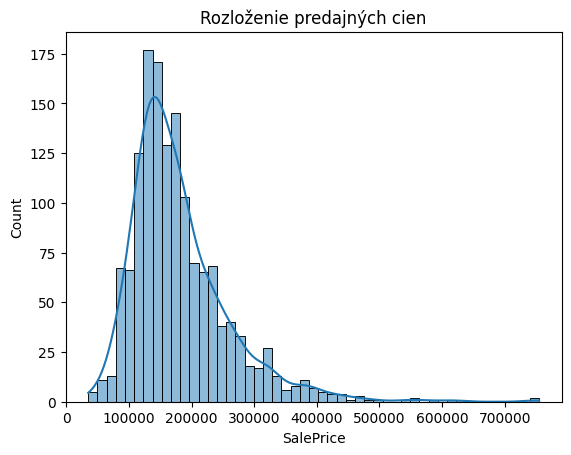

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graf rozloženia cien domov
sns.histplot(train["SalePrice"], kde=True)
plt.title("Rozloženie predajných cien")
plt.show()

In [7]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)
print("Chýbajúce hodnoty v dátach:")
print(missing_values)

Chýbajúce hodnoty v dátach:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [8]:
def missing_value_summary(df):
    """
    Vráti tabuľku s počtom chýbajúcich hodnôt a typom dát pre každý stĺpec.
    Zobrazí len stĺpce, ktoré majú aspoň jednu chýbajúcu hodnotu.

    Parametre:
        df (pd.DataFrame): vstupný DataFrame

    Výstup:
        pd.DataFrame: tabuľka s 'MissingValues' a 'DataType'
    """
    missing = df.isnull().sum()
    types = df.dtypes

    df = pd.DataFrame({
        'MissingValues': missing,
        'DataType': types
    })

    df = df[df['MissingValues'] > 0]
    df = df.sort_values(by='MissingValues', ascending=False)

    return df


In [9]:
train = train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [10]:
missing_value_summary(train)

,MissingValues,DataType
MasVnrType,872,object
FireplaceQu,690,object
LotFrontage,259,float64
GarageYrBlt,81,float64
GarageFinish,81,object
GarageType,81,object
GarageQual,81,object
GarageCond,81,object
BsmtExposure,38,object
BsmtFinType2,38,object


In [11]:
num_cols = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
for col in num_cols:
    train[col] = train[col].fillna(train[col].median())

In [12]:
cat_cols = ['MasVnrType', 'FireplaceQu', 'GarageFinish', 'GarageType', 'GarageQual',
            'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual',
            'BsmtFinType1', 'Electrical']

for col in cat_cols:
    train[col] = train[col].fillna("None")

In [13]:
missing_value_summary(train)

,MissingValues,DataType


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Linear Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [16]:
features = [
    'GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'GarageArea',
    'YearBuilt', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', '1stFlrSF'
]
X = train[features]
y = train['SalePrice']

In [17]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_pred = model.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 39419.54248188


## Random Forest 


In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split=2,  
    random_state=42    
)

In [22]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Random Forest RMSE:", rmse)

Random Forest RMSE: 29009.590238678313


## XGBoost

In [24]:
import xgboost
print(xgboost.__version__)

3.0.2


In [25]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [26]:
model = XGBRegressor(
    n_estimators=100,    # počet stromov (čím viac, tým presnejší, ale pomalší)
    learning_rate=0.05,   # rýchlosť učenia (čím menšie, tým pomalšie ale presnejšie)
    max_depth=5,         # maximálna hĺbka stromu
    random_state=42,     # pre rovnaké výsledky pri opakovaní
    verbosity=1          # úroveň výpisu (0 = nič, 1 = bežné info)
)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [27]:
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("XGBoost RMSE:", rmse)

XGBoost RMSE: 28846.841906870846


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}

grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, 
                    scoring='neg_root_mean_squared_error',
                    cv=3, verbose=1)

grid.fit(X_train, y_train)

print("Najlepšie parametre:", grid.best_params_)
print("Najlepšie RMSE:", -grid.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Najlepšie parametre: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Najlepšie RMSE: 29714.677734375


## Test 

In [36]:
test = pd.read_csv("test.csv")
test_ids = test["Id"]

In [37]:
test['LotFrontage'] = test['LotFrontage'].fillna(train['LotFrontage'].median())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(train['GarageYrBlt'].median())
test['MasVnrArea'] = test['MasVnrArea'].fillna(train['MasVnrArea'].median())

In [38]:
cat_cols = ['MasVnrType', 'FireplaceQu', 'GarageFinish', 'GarageType', 'GarageQual',
            'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtQual',
            'BsmtFinType1', 'Electrical']

In [39]:
for col in cat_cols:
    test[col] = test[col].fillna("None")

In [40]:
x_test = test[features]
preds = model.predict(x_test)

In [41]:
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": preds
})

submission.to_csv("submission.csv", index=False)
